<a href="https://colab.research.google.com/github/ucfilho/marquesgabi_maio_2020/blob/master/ANN_segmentacao_sugar_OUR_CODE_v_09_maio_26_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import zipfile
#import random
from random import randint
from PIL import Image
import re
from sklearn.model_selection import train_test_split

In [2]:
!pip install mahotas

In [0]:
import mahotas.features.texture as mht
import mahotas.features

In [4]:
!git clone https://github.com/ucfilho/marquesgabi_fev_2020 #clonar do Github
%cd marquesgabi_fev_2020

import Go2BlackWhite
import Go2Mahotas

fatal: destination path 'marquesgabi_fev_2020' already exists and is not an empty directory.
/content/marquesgabi_fev_2020


In [0]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

In [6]:
''''''
!git clone https://github.com/marquesgabi/Doutorado
%cd Doutorado
Transfere='Fotos9Amostras720_e_varios_graos.zip'
file_name = zipfile.ZipFile(Transfere, 'r')
file_name.extractall()


fatal: destination path 'Doutorado' already exists and is not an empty directory.
/content/marquesgabi_fev_2020/Doutorado


In [0]:
Size=28 # tamanho da foto
Sub_Size=int(Size/5) # tamanho do fracionamento
Row_Crop=1/2 # posicao do corte
Crop=int(Size*Row_Crop)

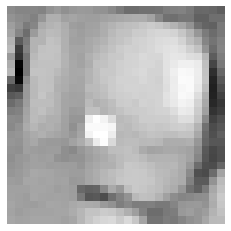

In [8]:
ww,img_name=Go2BlackWhite.BlackWhite(Transfere,Size)
plt.axis("off")
plt.imshow(ww[10], cmap = "gray")

In [9]:
y_valor=[]

Graos='G' # numero 1
Indef='I' # numero 2
Buraco='B' # numero 3
Varios='V' # numero 4

for x in img_name:
  if re.search(Graos, x):
    y_valor.append(1)
  elif re.search(Indef, x):
    y_valor.append(2)
  elif re.search(Buraco, x):
    y_valor.append(3)
  else:
    y_valor.append(4)
    
print(y_valor)
print(len(y_valor))

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 3, 3, 3, 

In [0]:
W_train, W_test, yw_train, yw_test = train_test_split(np.array(ww), np.array(y_valor), 
                                                    test_size=0.30, 
                                                    random_state=42)

In [0]:
train_images=W_train
train_labels=yw_train
test_images=W_test
test_labels=yw_test

In [12]:

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])
''''''

''

In [0]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [14]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
20/20 [==============================] - 0s 2ms/step - loss: 86.6100 - accuracy: 0.3582 
Epoch 2/10
20/20 [==============================] - 0s 2ms/step - loss: 28.7607 - accuracy: 0.5219
Epoch 3/10
20/20 [==============================] - 0s 2ms/step - loss: 27.2267 - accuracy: 0.5916
Epoch 4/10
20/20 [==============================] - 0s 2ms/step - loss: 12.7419 - accuracy: 0.6580
Epoch 5/10
20/20 [==============================] - 0s 2ms/step - loss: 14.7714 - accuracy: 0.6305
Epoch 6/10
20/20 [==============================] - 0s 2ms/step - loss: 19.7946 - accuracy: 0.6159
Epoch 7/10
20/20 [==============================] - 0s 2ms/step - loss: 24.0796 - accuracy: 0.6256
Epoch 8/10
20/20 [==============================] - 0s 2ms/step - loss: 14.5446 - accuracy: 0.6580
Epoch 9/10
20/20 [==============================] - 0s 2ms/step - loss: 9.2026 - accuracy: 0.7455
Epoch 10/10
20/20 [==============================] - 0s 2ms/step - loss: 10.9544 - accuracy: 0.6856


In [0]:
#print(type(train_images))
#print(train_images[2])

In [16]:
predictions = model.predict(train_images) #x_test[:3])
print('predictions shape:', predictions.shape)

predictions shape: (617, 10)


In [36]:
print(predictions)

[[  265.66635    545.3926     541.9499   ... -1172.1495    -346.09775
    -78.52069 ]
 [  321.7822     751.88855    641.86804  ... -1423.3533    -445.12677
    -86.92424 ]
 [  401.864      684.626      852.57587  ... -1984.7092    -669.2365
   -171.0758  ]
 ...
 [  291.9799     738.48364    591.1837   ... -1266.2635    -469.57135
    -84.244606]
 [  351.58487    645.97473    618.38025  ... -1357.6471    -454.10266
   -177.6215  ]
 [  189.59012    244.65388    361.52325  ...  -899.7341    -263.125
   -128.95284 ]]


In [37]:
print(train_images.shape)

(617, 28, 28)


In [18]:
#print(train_images[0])
result = model.evaluate(train_images) # esta estranho
print(result)
result = model.predict(train_images) # esta estranho
print(result)

20/20 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00
[0.0, 0.0]
[[  265.66635    545.3926     541.9499   ... -1172.1495    -346.09775
    -78.52069 ]
 [  321.7822     751.88855    641.86804  ... -1423.3533    -445.12677
    -86.92424 ]
 [  401.864      684.626      852.57587  ... -1984.7092    -669.2365
   -171.0758  ]
 ...
 [  291.9799     738.48364    591.1837   ... -1266.2635    -469.57135
    -84.244606]
 [  351.58487    645.97473    618.38025  ... -1357.6471    -454.10266
   -177.6215  ]
 [  189.59012    244.65388    361.52325  ...  -899.7341    -263.125
   -128.95284 ]]


In [0]:
Size=1200 # tamanho da foto
Sub_Size=int(Size/5) # tamanho do fracionamento
Row_Crop=1/2 # posicao do corte
Crop=int(Size*Row_Crop)

In [0]:
# img = img_as_float(astronaut()[::2, ::2])

Transfere='Fotos_Grandes_3cdAmostra.zip'
#Nome='Q6-1-4.jpg'
file_name = zipfile.ZipFile(Transfere, 'r')
file_name.extractall()
#img=cv2.imread(Nome)

In [0]:
ww,img_name=Go2BlackWhite.BlackWhite(Transfere,Size)
img=ww[0]

In [22]:
print(img.shape)

(1200, 1200)


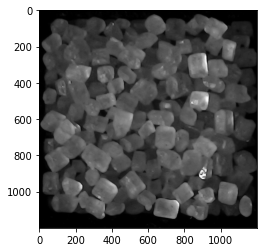

In [23]:
plt.imshow(img, cmap = "gray")

In [0]:
a=0
b=1200
c=100
d=200
Num=50
ww=[]
label=[]

for i in range(Num):
  #x=random.randint(a, b)
  #y=random.randint(a, b)
  #Width=random.randint(c, d)
  x=randint(a, b)
  y=randint(a, b)
  Width=randint(c, d)
  img_1st=np.zeros((Width,Width)).astype(np.int64)

  for i in range(Width):
    for j in range(Width):

      size_x=Width+x
      size_y=Width+y
    
      if(size_x>=Size):
        x=Size-Width

      if(size_y>= Size):
        y=Size-Width

      img_1st[i,j]=np.copy(img[i+y,j+x])
  ww.append(img_1st)
  nome = "W=" + str(Width)+" x="+str(x)+" y="+str(y)
  label.append(nome)


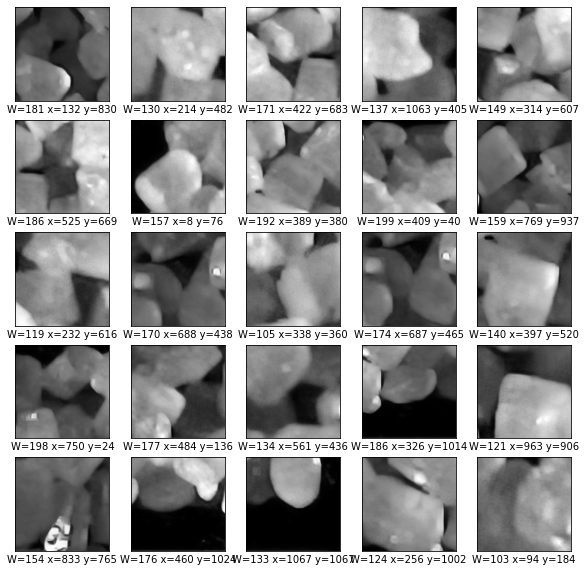

In [25]:
Num=25
plt.figure(figsize=(10,10))
for i in range(Num):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(ww[i], cmap = "gray")
    plt.xlabel(label[i])
plt.show()


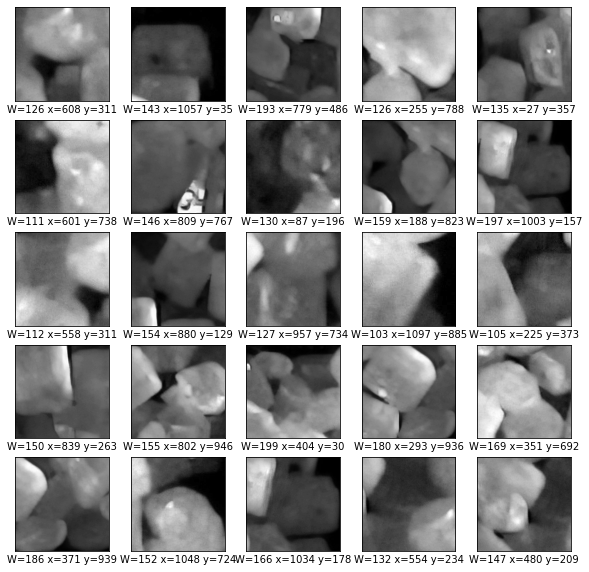

In [26]:
Num=25
plt.figure(figsize=(10,10))
for i in range(Num):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(ww[i+25], cmap = "gray")
    plt.xlabel(label[i+25])
plt.show()

In [27]:
print(label)

['W=181 x=132 y=830', 'W=130 x=214 y=482', 'W=171 x=422 y=683', 'W=137 x=1063 y=405', 'W=149 x=314 y=607', 'W=186 x=525 y=669', 'W=157 x=8 y=76', 'W=192 x=389 y=380', 'W=199 x=409 y=40', 'W=159 x=769 y=937', 'W=119 x=232 y=616', 'W=170 x=688 y=438', 'W=105 x=338 y=360', 'W=174 x=687 y=465', 'W=140 x=397 y=520', 'W=198 x=750 y=24', 'W=177 x=484 y=136', 'W=134 x=561 y=436', 'W=186 x=326 y=1014', 'W=121 x=963 y=906', 'W=154 x=833 y=765', 'W=176 x=460 y=1024', 'W=133 x=1067 y=1067', 'W=124 x=256 y=1002', 'W=103 x=94 y=184', 'W=126 x=608 y=311', 'W=143 x=1057 y=35', 'W=193 x=779 y=486', 'W=126 x=255 y=788', 'W=135 x=27 y=357', 'W=111 x=601 y=738', 'W=146 x=809 y=767', 'W=130 x=87 y=196', 'W=159 x=188 y=823', 'W=197 x=1003 y=157', 'W=112 x=558 y=311', 'W=154 x=880 y=129', 'W=127 x=957 y=734', 'W=103 x=1097 y=885', 'W=105 x=225 y=373', 'W=150 x=839 y=263', 'W=155 x=802 y=946', 'W=199 x=404 y=30', 'W=180 x=293 y=936', 'W=169 x=351 y=692', 'W=186 x=371 y=939', 'W=152 x=1048 y=724', 'W=166 x=103

In [0]:
#img = ww[0].reshape((28,28))
#ww[0].shape
#ww[0].size

In [29]:
'''
img=ww[0]
basewidth = 28 # MNIST image width
#img = Image.open('your_input_img.jpg')
wpercent = (basewidth/float(img.shape[0]))
hsize = int((float(img.shape[1])*float(wpercent)))
#img = img.resize((basewidth,hsize), Image.ANTIALIAS)
img = img.resize((basewidth,hsize))
'''

"\nimg=ww[0]\nbasewidth = 28 # MNIST image width\n#img = Image.open('your_input_img.jpg')\nwpercent = (basewidth/float(img.shape[0]))\nhsize = int((float(img.shape[1])*float(wpercent)))\n#img = img.resize((basewidth,hsize), Image.ANTIALIAS)\nimg = img.resize((basewidth,hsize))\n"

In [30]:
print(np.array(ww[0]))

[[ 96  96  98 ...  83  83  86]
 [ 97  98 100 ...  87  87  87]
 [ 99 100 101 ...  92  90  89]
 ...
 [ 39  42  45 ...  97  96  96]
 [ 40  43  46 ...  97  95  95]
 [ 41  44  46 ...  95  94  93]]


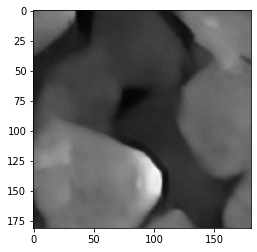

In [31]:
plt.imshow(ww[0], cmap = "gray")

In [32]:
'''
xw=[]
Size=28
for i in range(Num):
  xw.append(cv2.resize(np.array(ww[0]),(Size,Size)))
'''

'\nxw=[]\nSize=28\nfor i in range(Num):\n  xw.append(cv2.resize(np.array(ww[0]),(Size,Size)))\n'

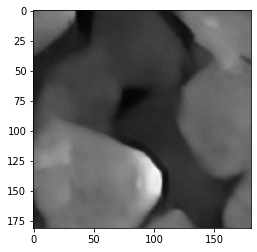

In [33]:

data=np.array(ww[0])
img = Image.fromarray(data.astype('uint8'), mode='L')
plt.imshow(img, cmap = "gray")


In [34]:
Size=28
xw=[]
# xw.append(cv2.resize(cv2.imread(img),(Size,Size)))
# xw.append(cv2.resize(img,(Size,Size)))
img=np.float32(img)
img=cv2.resize(img,(Size,Size), interpolation = cv2.INTER_AREA)
print(img)


[[102.04198  108.66015  111.11447  116.19606  122.52947   61.325478
    9.17939   17.033363  40.608196  46.480545  47.50472   48.165443
   49.98318   51.131622  53.189007  51.71103   32.969692  25.998537
   55.278294  97.81893  110.70865  109.66046  109.216385 106.63197
  104.83347  104.17286   99.04569   92.57813 ]
 [106.33335  106.44806  108.19631  109.555786  93.55795   38.1699
   10.207931  20.214464  41.44028   42.93572   44.778793  46.438507
   49.717316  52.797443  56.80104   57.829346  50.586002  29.386831
   23.164068  70.88184  106.19267  112.713844 129.89273  125.99702
  110.920395 108.95446  107.13073  103.5814  ]
 [ 97.54418   97.49657   98.05088   89.39816   51.071396  28.569946
   13.363755  25.168951  43.249813  45.655052  46.371082  47.48845
   50.85733   53.55194   57.945366  58.86097   58.66173   47.679104
   26.1025    23.046185  83.74928  111.017975 120.64129  124.4408
  117.403915 113.96059  109.10318  105.98599 ]
 [ 88.49458   85.52691   77.95437   48.032448  32.

In [35]:
# predictions = model.predict(xw[0])
#predictions = model.predict(img)
# predictions = model.predict(ww[0])
result = model.evaluate(np.array(img))

ValueError: ignored

In [0]:
img.shape

In [0]:
28*28



In [0]:
img.size

In [0]:
#print(xw)